In [1]:
import math
import os

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import math as m
#output is load and location input is the peaks of the resistance data
# potential algorithms to be tested in this study
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

from sklearn.svm import SVR
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [2]:
# 2D cartresian to polar
def cart2pol(x, y):
    r = np.sqrt(x ** 2 + y ** 2)
    the = np.arctan2(y, x)
    return (r, the)

In [3]:
# 2D polar to cartesian
def pol2cart(r, the):
    x = r * np.cos(the)
    y = r * np.sin(the)
    return (x, y)

In [4]:
# l = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Label_path\\labels.csv")
# print(l.iloc[5, 2])

In [5]:
# extract r and theta label from the label file
def location_data(label_path, file_name): #filename is the nlocation
    # read the label csv
    lbl = pd.read_csv(label_path)
    for i in range(0, len(lbl)):
        if file_name == lbl.iloc[i, 0]:
            # first index as r, second as theta, and third as phi from spherical location
            return lbl.iloc[i, 1], lbl.iloc[i, 2] #, lbl.iloc[i, 3]

In [6]:
location_data("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Label_path\\labels.csv", 'NE1.csv')

(2, 45.0)

In [7]:
# # 3d polar to cartesian
# def polar2cart(r, theta, phi):
#     x = r * math.sin(theta) * math.cos(phi)  # x=rsin.cos
#     y = r * math.sin(theta) * math.sin(phi)  # y=rsin.sin.
#     z = r * math.cos(theta)  # z=rcos.
#     return x, y, z
#

In [8]:
# # 3d cartesian to polar
# def cart2polar(x, y, z):
#     XsqPlusYsq = x ** 2 + y ** 2
#     r = m.sqrt(XsqPlusYsq + z ** 2)  # r
#     the = m.atan2(z, m.sqrt(XsqPlusYsq))  # theta
#     phi = m.atan2(y, x)  # phi
#     return r, the, phi

In [9]:
# os.listdir("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Peaks_Data")

In [10]:
# read data, still needs refinement
def read_data(signal_path, label_path):
    files = os.listdir(signal_path)
    load = []
    R1 = []
    R2 = []
    R3 = []
    R4 = []
    x = []
    y = []
    for i in range(0, len(files)):
        # read each synchronised csv file one by one for resistence
        f = pd.read_csv(signal_path + '\\' + files[i])
#         print(f.shape)

        # label extraction using polar coordinates
#         print(files[i])
#         print(label_path)
        r, the = location_data(label_path, files[i])

        # convert it to the cartesian format, both 3D and 3D version functions are available
        x_, y_ = pol2cart(r, the)
        # iterate over each df to extract the data
        for j in range(0, f.shape[0]):
            load.append(f.iloc[j, 4])  # load column, need to double check with the synchronised data
            # Need to double check with the synchronised data, you can add other three sensor data as well
            R1.append(f.iloc[j, 0])
            R2.append(f.iloc[j, 1])
            R3.append(f.iloc[j, 2])
            R4.append(f.iloc[j, 3])
            x.append(x_)  # x co-ordindate
            y.append(y_)  # y co-ordinate
           # z.append(z_)  # z co-ordinate
    
#     print(len(R1))
#     print(len(R2))
#     print(len(R3))
#     print(len(R4))
#     print(len(load))
    return load, R1,R2,R3,R4, x, y # here is only one resistence, you can use 3 more resistance here.

In [11]:
# read_data( "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Peaks_Data", "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Label_path\\labels.csv")
# # signal path
# signal_path = "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Peaks_Data"
#     # label path
# label_path = "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Label_path\\labels.csv"
#     # read data
# files = os.listdir(signal_path)
# g, r = location_data(label_path, files[2])
# # print(g,r)
# # load1, R1t,R2t,R3t,R4t, xt, yt = read_data(signal_path, label_path)

In [12]:
# ml model
def ml_model():
    #number of neighbours adjusted for an optimised response
    model = KNeighborsRegressor(n_neighbors=9)  
    return model

In [13]:
def tree_model():
    # we may choose an algorithm according to their performance
    model_tree = DecisionTreeRegressor(random_state = 0)
    return model_tree

In [14]:
def Lin_model():
    # we may choose an algorithm according to their performance
    model_Lin = LinearRegression() 
    return model_Lin

In [15]:
def forest_model():
    # Changed estimator to find an optamised response.
    model_forest = RandomForestRegressor(n_estimators = 150, random_state = 0)  
    return model_forest

In [16]:

def SVR_model():
    #tested different kernels to find and optimised outcome.
    model_SVR = SVR(kernel='rbf', gamma = 'auto') 
    return model_SVR

In [17]:
# data split
def data_split(X, y):
    trainX, trainY, testX, testY = train_test_split(X, y, test_size=0.3, random_state=10, stratify=True)
    return trainX, trainY, testX, testY

In [18]:
def MultiOut_model():
    
    gbr = GradientBoostingRegressor()
    svr =  SVR(kernel='rbf', gamma = 'auto')
    model_MultiOut = MultiOutputRegressor(estimator=gbr)
    return model_MultiOut

# The load algorithm: R1 - R4 / Load
# Model 1: KNeighbours Regressor
# Model 2: Simple Vector Regression (SVR)
# Model 3: Linear Regression

In [19]:
#The following code is for the first algorithm which takes the resistance data as input and the load as output - predicts
#the stregth/load of the kick based on resistance output as the peaks of resistance data are proporitonal to the peaks of load

if __name__ == '__main__':
    # signal path
    signal_path = "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Peaks_Data"
    # label path
    label_path = "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Label_path\\labels.csv"
    # read data
    
    
    #resistance need to be 4 R1-R4
    load, R1 ,R2 ,R3 ,R4 , x, y = read_data(signal_path, label_path)
    
    # call ml model
    model = ml_model()
    model_SVR = SVR_model()
    model_Lin = Lin_model()

    # input and output labels separation
#     print(type(R1))
    
    X = pd.DataFrame([R1,R2,R3,R4,load]).T # input variable / output?
    X.columns = ['R1','R2','R3','R4','load']
#     print(X.head())
#     print(X.head)
    #Why are 4 versions of each number - 
#     print(len(load))
#     print(X.shape)
#     for i in range(len(x)):
#         print(x[i],y[i])
    Y = load  # output variable / Input?
#     print(len(Y))
    #random indexing - split ratio.
    #do not average them especially for the location data.(input 2D) - location scenario
    #do not stack them.
    #can average them for load magnitude estimation.
    #each input = R1 + R2 + R3 + R4 (concatination) - A vector of 4 by 1 - load scenario

    
    # train-test split
#     Xtrain, Ytrain, Xtest, Ytest = data_split(X, y)
    Xtrain, Xtest, Ytrain,Ytest = train_test_split(X[['R1','R2','R3','R4']] , X['load'], test_size=0.29, random_state=10)
#     print(Ytest.shape)
#     print(Ytrain.shape)
    
#     print(Xtrain.shape)
#     print(Xtest.shape)
#     print(X.shape)
#     print(Y.shape)
    # fit and train the model
    model.fit(Xtrain, Ytrain)
    model_SVR.fit(Xtrain, Ytrain)
    model_Lin.fit(Xtrain, Ytrain)
    
    # predict the values
    pred_y = model.predict(Xtest)
    pred_y_train = model.predict(Xtrain)
    
    pred_y_Lin = model_Lin.predict(Xtest)
    pred_y_train_Lin = model_Lin.predict(Xtrain)
    
    pred_y_SVR = model_SVR.predict(Xtest)
    pred_y_train_SVR = model_SVR.predict(Xtrain)

    # model prediction accuracy
    score = model.score(Xtest, Ytest)
    print("model prediction accuracy is:", score)
    
    #try new kernels and parameters
    score_SVR = model_SVR.score(Xtest, Ytest)
    print("model prediction accuracy for the SVR model is:", score_SVR)  
    
    score_Lin = model_Lin.score(Xtest, Ytest)
    print("model prediction accuracy for the Linear model is:", score_Lin) 
    
    # mean square error
    mse = mean_squared_error(Ytest, pred_y)
    print("Mean Squared Error:", mse)
    mse_SVR = mean_squared_error(Ytest, pred_y_SVR)
    print("Mean Squared Error for the SVR model:", mse_SVR)
    mse_Lin = mean_squared_error(Ytest, pred_y_Lin)
    print("Mean Squared Error for the Linear model:", mse_Lin)

    # root mean square
    rmse = math.sqrt(mse)
    print("Root Mean Squared Error:", rmse)
    rmse_SVR = math.sqrt(mse_SVR)
    print("Root Mean Squared Error:", rmse_SVR)
    rmse_Lin = math.sqrt(mse_Lin)
    print("Root Mean Squared Error:", rmse_Lin)

    #find the corrolation***
    #y test vs  y predicted --> correlation 
    # calculate spearman's correlation: Non-linearity
    #KNN:
    corrs, _ = spearmanr(Ytest, pred_y)
    print('Spearmans correlation for KNN model: %.3f' % corrs)
    #SVR:
    corrs_SVR, _ = spearmanr(Ytest, pred_y_SVR)
    print('Spearmans correlation for SVR model: %.3f' % corrs_SVR)
    #SVR:
    corrs_Lin, _ = spearmanr(Ytest, pred_y_Lin)
    print('Spearmans correlation for Linear model: %.3f' % corrs_Lin)
    
    # calculate Pearson's correlation: Linearity
    
    #KNN
    corrp, _ = pearsonr(Ytest, pred_y)
    print('Pearsons correlation KNN: %.3f' % corrp)
    #SVR:
    corrp_SVR, _ = pearsonr(Ytest, pred_y_SVR)
    print('pearsonr correlation for SVR model: %.3f' % corrp_SVR)
    #SVR:
    corrp_Lin, _ = pearsonr(Ytest, pred_y_Lin)
    print('pearsonr correlation for Linear model: %.3f' % corrp_Lin)

model prediction accuracy is: 0.6118951177587677
model prediction accuracy for the SVR model is: 0.5301997295339629
model prediction accuracy for the Linear model is: 0.005896030149504128
Mean Squared Error: 0.1580436599430813
Mean Squared Error for the SVR model: 0.19131156958894285
Mean Squared Error for the Linear model: 0.4048179678952447
Root Mean Squared Error: 0.3975470537472027
Root Mean Squared Error: 0.4373917804313918
Root Mean Squared Error: 0.6362530690654817
Spearmans correlation for KNN model: 0.803
Spearmans correlation for SVR model: 0.753
Spearmans correlation for Linear model: 0.533
Pearsons correlation KNN: 0.785
pearsonr correlation for SVR model: 0.738
pearsonr correlation for Linear model: 0.081


In [20]:
print(X[['R1','R2','R3','R4']])

             R1        R2        R3            R4
0      0.010710  0.001355  0.000357  7.386734e-03
1      0.001640  0.001992  0.000199  2.668245e-03
2      0.001596  0.001030  0.000253  2.017346e-03
3      0.006231  0.004155  0.000197  1.905723e-03
4      0.004732  0.004351  0.000204  2.355445e-03
...         ...       ...       ...           ...
17076  0.613241  1.863784  0.519795  5.600000e+17
17077  0.740333  1.726260  0.416939  6.100000e+17
17078  0.813189  2.054339  0.624970  6.510000e+17
17079  0.726159  1.998248  0.576534  5.780000e+18
17080  0.791346  1.546835  0.237591  4.910000e+16

[17081 rows x 4 columns]


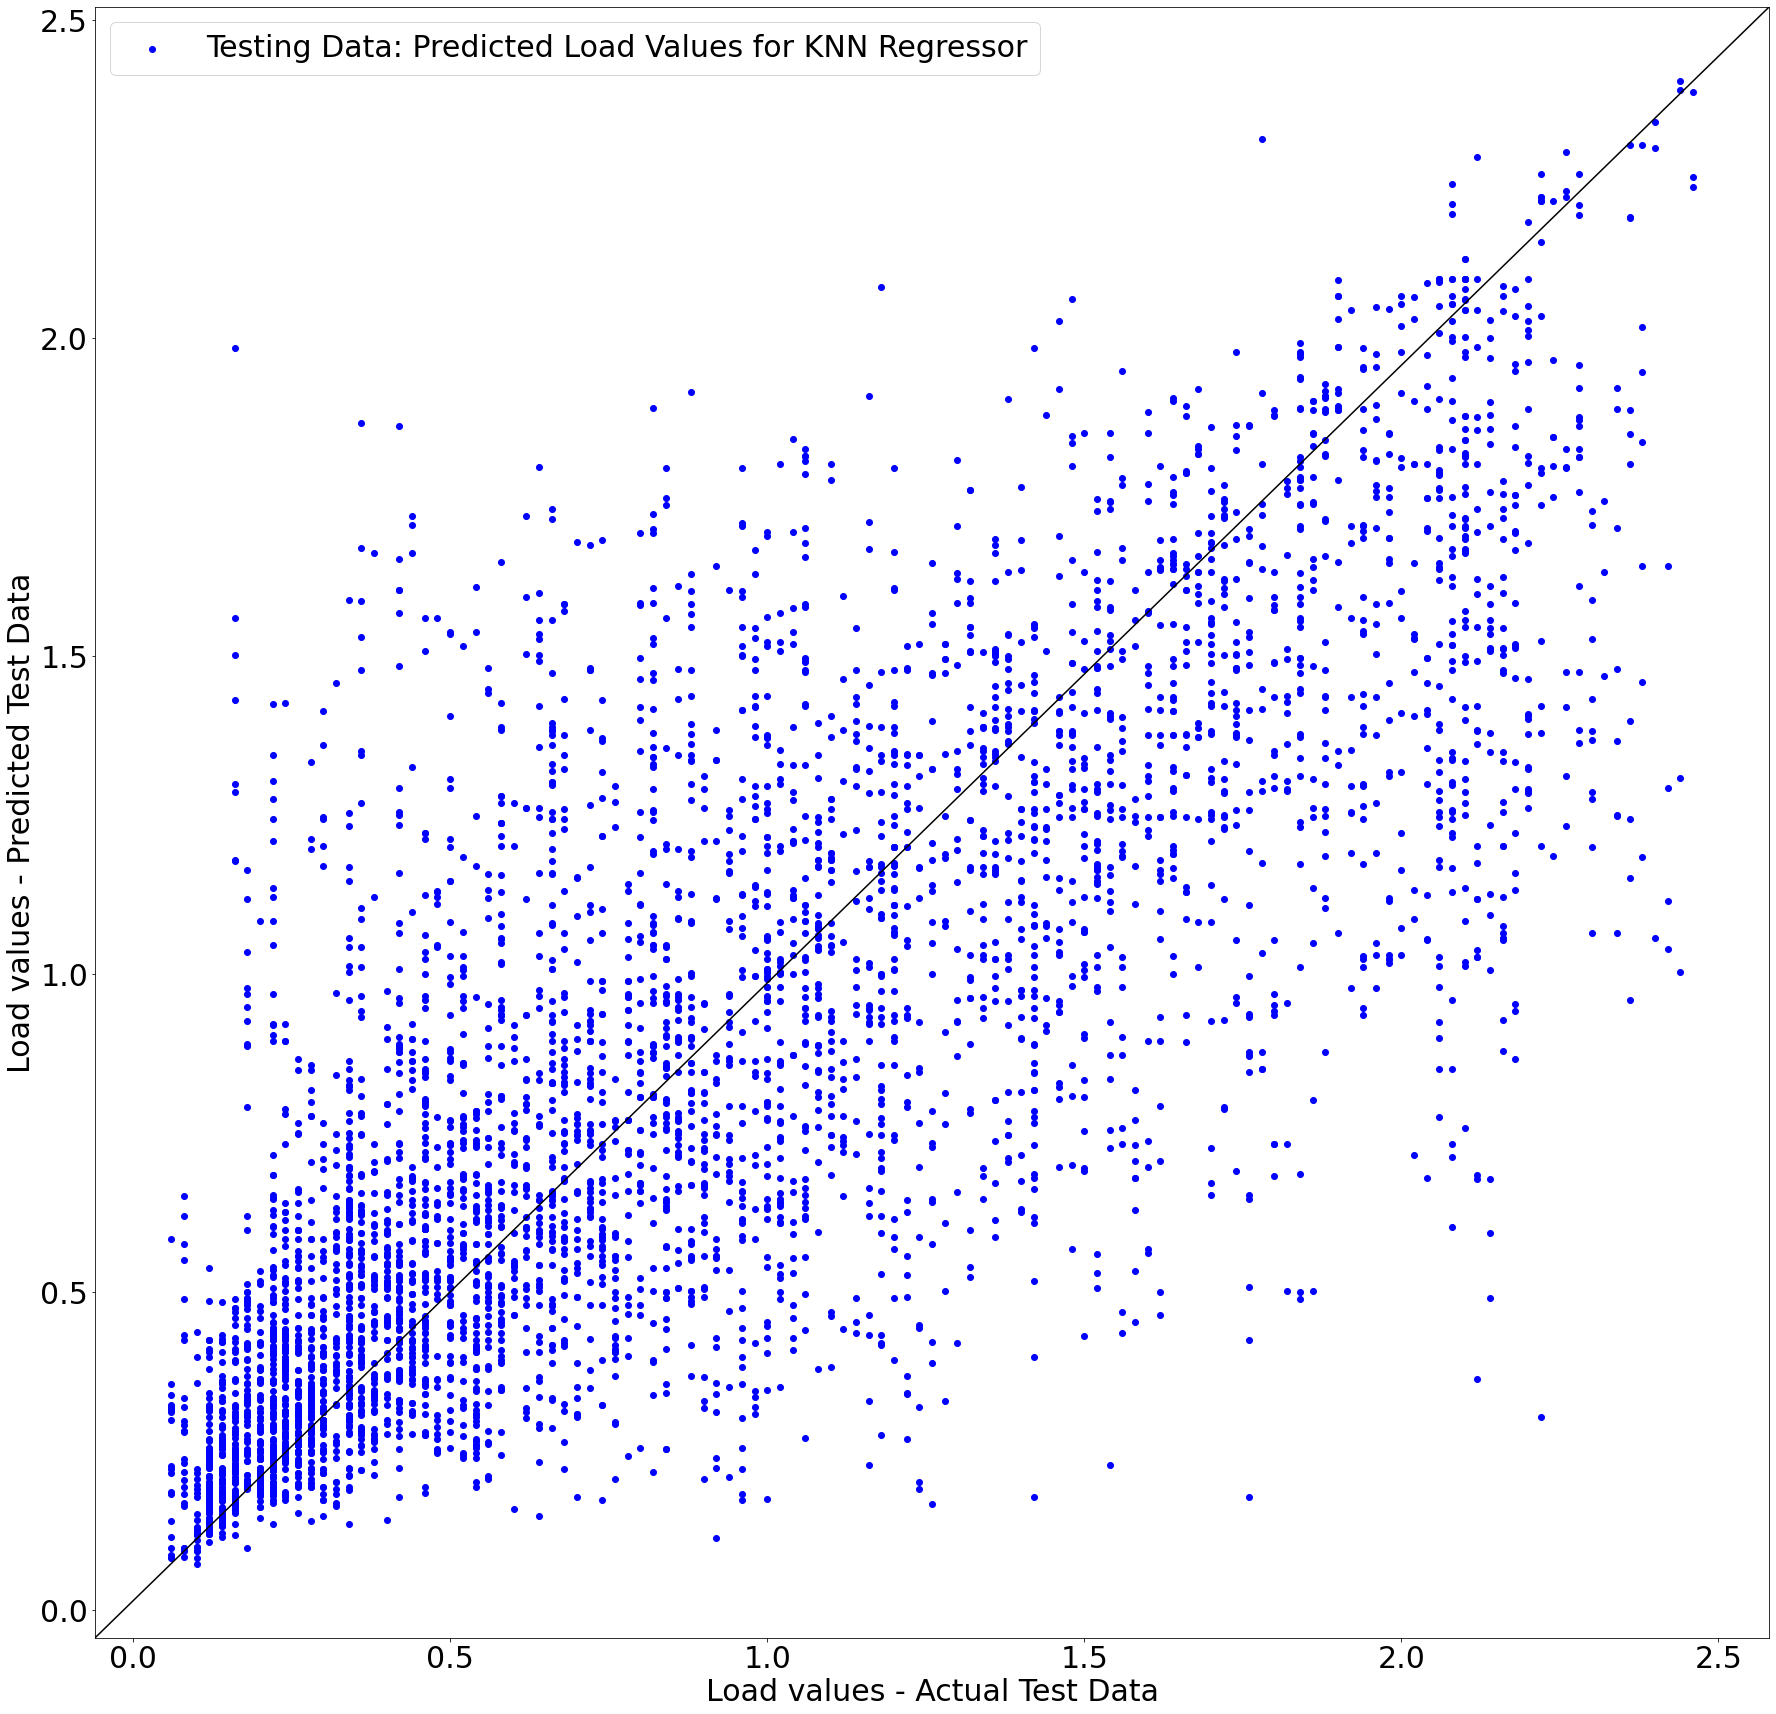

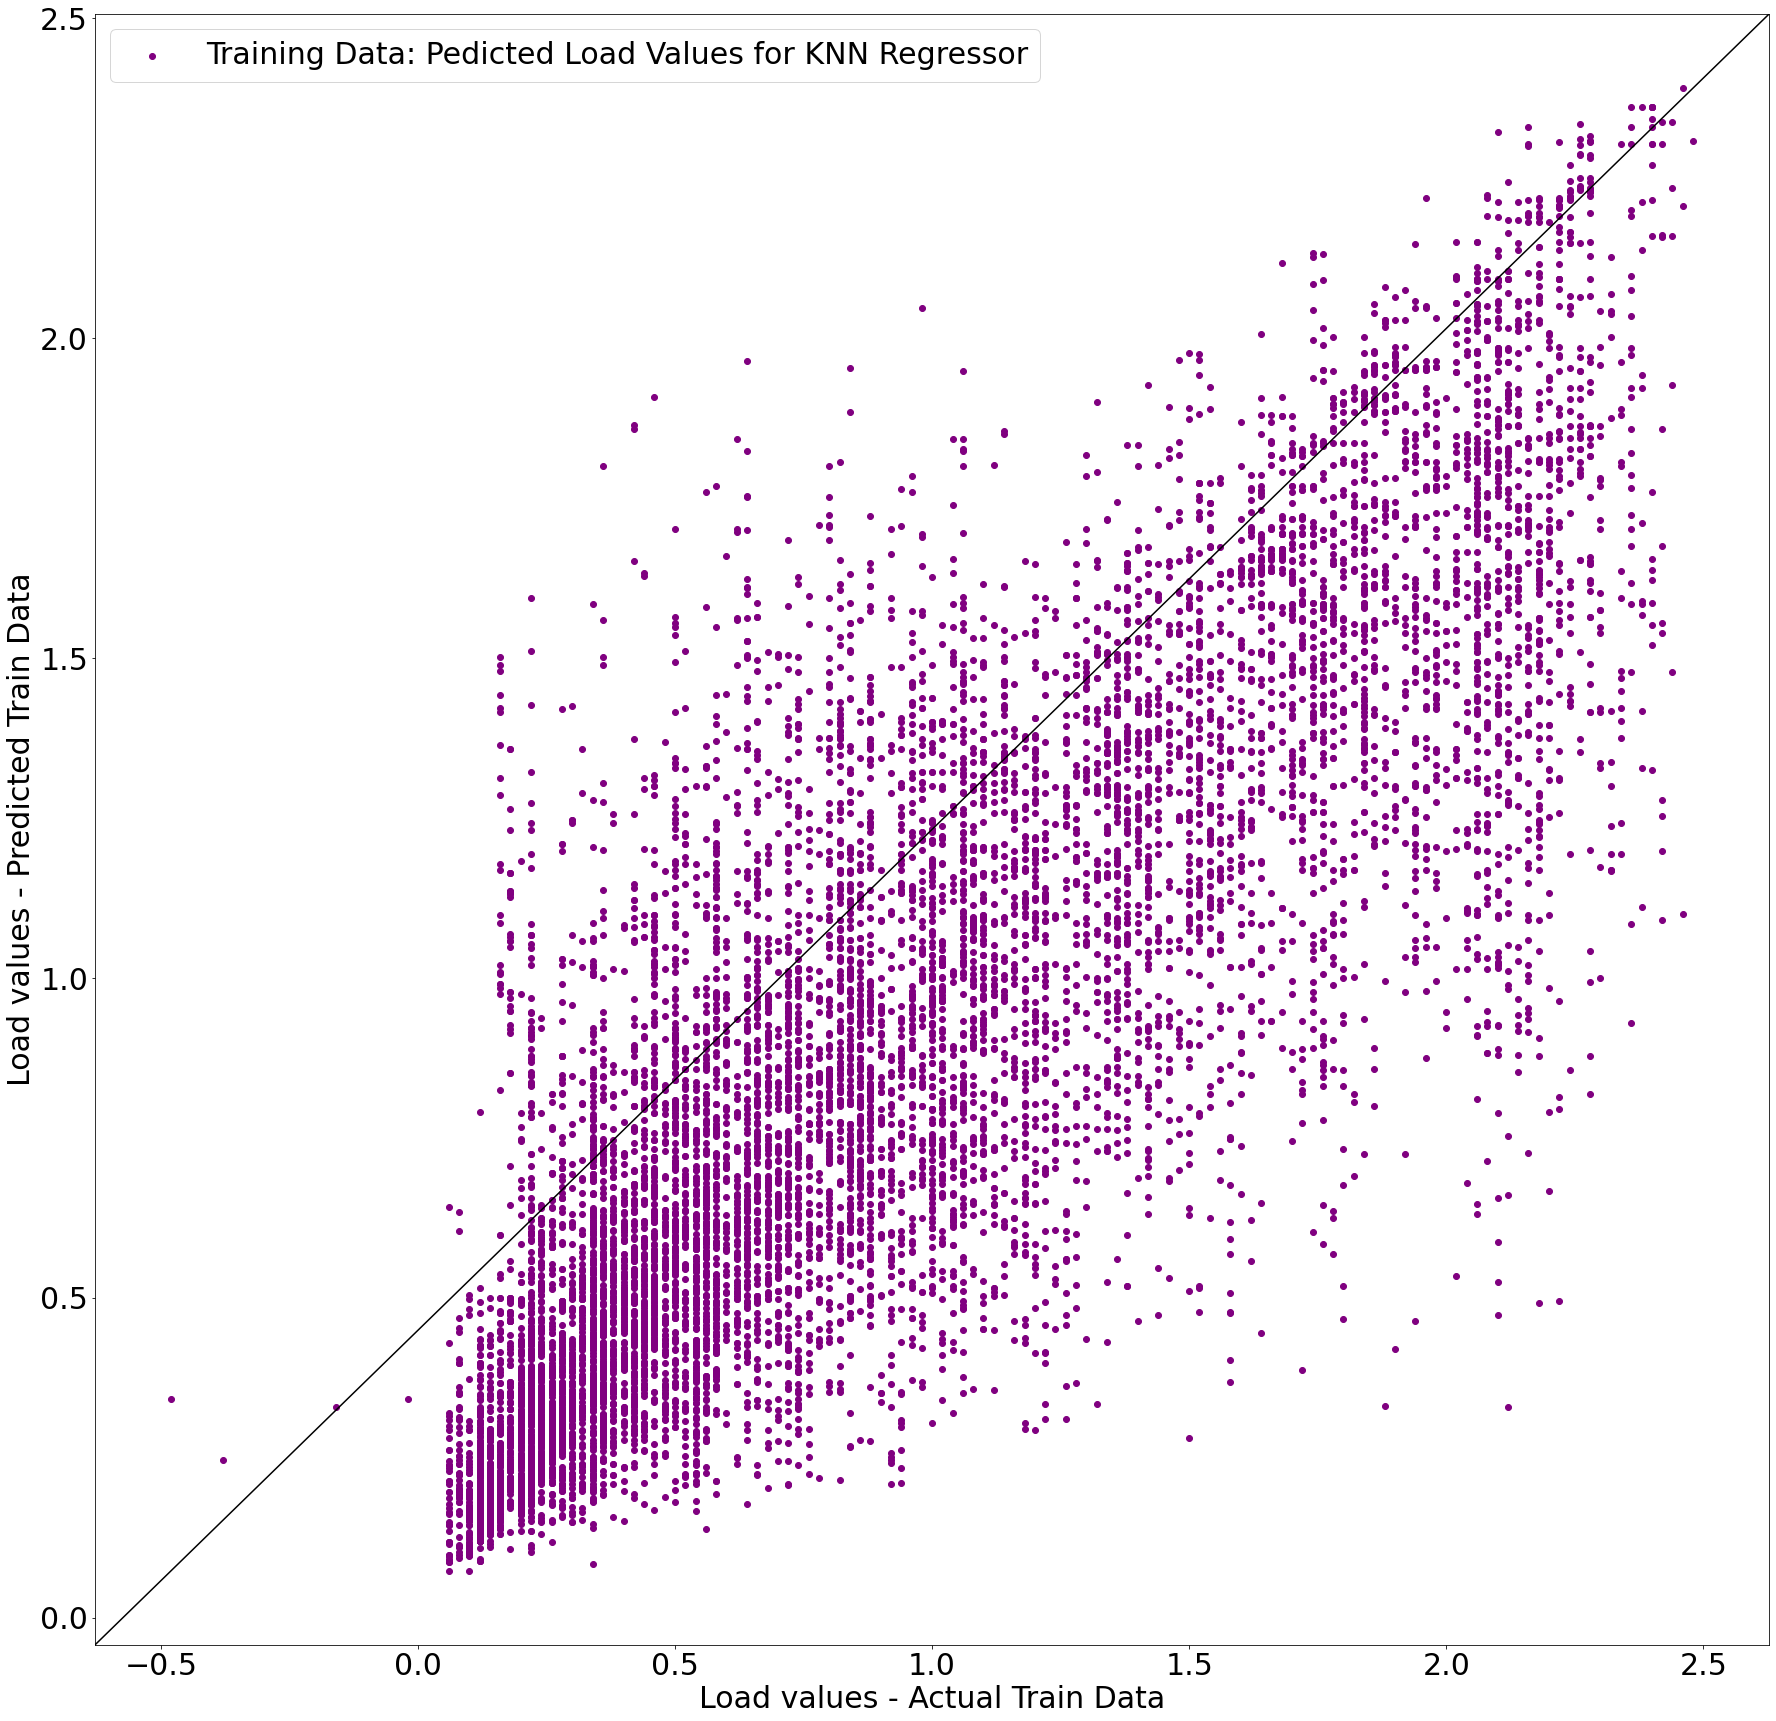

In [21]:
#plot the result
   
# plt.figure(figsize=(50, 20))
plt.rcParams['font.size'] = 30
fig1, ax1 = plt.subplots(figsize=(30, 30))

# x_ax = range(len(Ytest))
# ax1.scatter(x_ax, Ytest, s=5, color="blue", label="original")
# ax1.scatter(x_ax, pred_y, color="red", label="predicted")

#Plotting the test data against the predicted 
ax1.scatter(Ytest, pred_y, color="blue", label="Testing Data: Predicted Load Values for KNN Regressor")
# ax1.scatter(Ytest, pred_y_SVR, color="blue", label="Testing Data: Predicted Load Values for SVR Regressor")
# ax1.scatter(Ytest, pred_y_Lin, color="green", label="Testing Data: Predicted Load Values for Linear Regression")

ax1.set_xlabel('Load values - Actual Test Data')
ax1.set_ylabel('Load values - Predicted Test Data')
#over-fitting is happening 
#improve the algorithm to better generalise
#try other algorithm - 

line = mlines.Line2D([0, 1], [0, 1], color='black')
transform1 = ax1.transAxes
line.set_transform(transform1)
ax1.add_line(line)


plt.legend()
plt.show()



# plt.figure(figsize=(50, 20))
fig2, ax2 = plt.subplots(figsize=(30, 30))
plt.rcParams['font.size'] = 30
# ax2.scatter(x_ax_train, Ytrain, s=5, color="blue", label="original")

#Plotting the train data against the predicted y using training data:
ax2.scatter(Ytrain, pred_y_train, color="purple", label="Training Data: Pedicted Load Values for KNN Regressor")
# ax2.scatter(Ytrain, pred_y_train_SVR, color="red", label="Training Data: Predicted Load Values for SVR Regressor")
# ax2.scatter(Ytrain, pred_y_train_Lin, color="red", label="Training Data: Predicted Load Values for Linear Regression")
ax2.set_xlabel('Load values - Actual Train Data')
ax2.set_ylabel('Load values - Predicted Train Data')
line_train = mlines.Line2D([0, 1], [0, 1], color='black')
transform2 = ax2.transAxes
line_train.set_transform(transform2)
ax2.add_line(line_train)
# plt.plot(line_train)
plt.legend()
plt.show()


# The location algorithm: R1-R4 Vs [x,y] coordinates:
# Model 1: KNeighbours
# Model 2: Random Forest
# Model 3: Decision Tree

In [22]:
#Takes the resistance as input and the location as output.
if __name__ == '__main__':
    #Using the sample data to find the output using the models.
    #Using the extra points to test the model:
    signal_path_EX = "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Extra_peaks"

    files_Ex = os.listdir(signal_path_EX)
    print(files_Ex)


    R1_ex = []
    R2_ex = []
    R3_ex = []
    R4_ex = []

    for i in range(0, len(files_Ex)):
            # read each synchronised csv file one by one for resistence
        fx = pd.read_csv(signal_path_EX + '\\' + files_Ex[i])
        print(fx.shape)

            # iterate over each df to extract the data
        for j in range(0, fx.shape[0]):
            # Need to double check with the synchronised data, you can add other three sensor data as well
            R1_ex.append(fx.iloc[j, 0])
            R2_ex.append(fx.iloc[j, 1])
            R3_ex.append(fx.iloc[j, 2])
            R4_ex.append(fx.iloc[j, 3])

    X_ex = pd.DataFrame([R1_ex,R2_ex,R3_ex,R4_ex]).T # input variable / output?
    X_ex.columns = ['R1','R2','R3','R4']

    print(type(X_ex))
    X_ex_test19 = X_ex.iloc[0:388, :]
    X_ex_test20 = X_ex.iloc[389:800, :]
    X_ex_test4 = X_ex.iloc[801: 1166, :]
    X_ex_test5 = X_ex.iloc[1167:1562, :]
    
    
    # signal path
    signal_path = "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Peaks_Data"
    # label path
    label_path = "C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\Label_path\\labels.csv"
    # read data
    #resistance need to be 4 R1-R4
    load, R1,R2,R3,R4 , x, y = read_data(signal_path, label_path)
    
    # call ml model
    model = ml_model()
    model_forest = forest_model()
    model_tree = tree_model()
    model_MultiOut = MultiOut_model()
    

    # input and output labels separation
#     print(type(R1))
    
    X_l = pd.DataFrame([R1,R2,R3,R4]).T # input variable / output?
    X_l.columns = ['R1','R2','R3','R4']

    Y_l = pd.DataFrame([x,y]).T  # output variable / Input?


    
    # train-test split
#     Xtrain, Ytrain, Xtest, Ytest = data_split(X, y)
    X_ltrain, X_ltest, Y_ltrain,Y_ltest = train_test_split(X_l , Y_l, test_size=0.3, random_state=10)

    # fit and train the model
    model.fit(X_ltrain, Y_ltrain)
    model_forest.fit(X_ltrain, Y_ltrain)
    model_tree.fit(X_ltrain, Y_ltrain)
    model_MultiOut.fit(X_ltrain, Y_ltrain)
    
    # predict the values for the test data
    pred_yl = model.predict(X_ltest)
    pred_y_forest = model_forest.predict(X_ltest)
    
    pred_y_test19 = model_forest.predict(X_ex_test19)
    pred_y_test20 = model_forest.predict(X_ex_test20)
    pred_y_test4 = model_forest.predict(X_ex_test4)
    pred_y_test5 = model_forest.predict(X_ex_test5)
    
    pred_y_tree = model_tree.predict(X_ltest)
    pred_y_multiout = model_MultiOut.predict(X_ltest)
  
    
    # predict the values for the train data
    pred_yl_train = model.predict(X_ltrain)
    pred_y_forest_train = model_forest.predict(X_ltrain)
    pred_y_tree_train = model_tree.predict(X_ltrain)
    pred_y_multiout_train = model_MultiOut.predict(X_ltrain)

    # model prediction accuracy
#     Y_ltest.iloc[:,0],pred_yl_df.iloc[:,0]
    scorel = model.score(X_ltest, Y_ltest)
    score_forest = model_forest.score(X_ltest, Y_ltest)
    score_tree = model_tree.score(X_ltest, Y_ltest)
    score_multiout = model_MultiOut.score(X_ltest, Y_ltest)

    
    print("The model prediction accuracy for:", scorel)
    print("The model prediction accuracy for the random fores is:", score_forest)
    print("The model prediction accuracy for the decision tree model is:", score_tree)
    print("The model prediction accuracy for the multi output model is:", score_multiout)
    
    
    
    # mean square error
    mse_l = mean_squared_error(Y_ltest, pred_yl)
    mse_forest = mean_squared_error(Y_ltest, pred_y_forest)
    mse_tree = mean_squared_error(Y_ltest, pred_y_tree)
    mse_multiout = mean_squared_error(Y_ltest, pred_y_multiout)
    
    print("Mean Squared Error:", mse_l)
    print("Mean Squared Error for random forest model:", mse_forest)
    print("Mean Squared Error for decision tree model:", mse_tree)
    print("Mean Squared Error for multi output model:", mse_multiout)


    # root mean square
    rmse_l = math.sqrt(mse_l)
    rmse_forest = math.sqrt(mse_forest)
    rmse_tree = math.sqrt(mse_tree)
    rmse_multiout = math.sqrt(mse_multiout)

    
    print("Root Mean Squared Error:", rmse_tree)
    print("Root Mean Squared Error for the random forest:", rmse_forest)
    print("Root Mean Squared Error for the decision tree:", rmse_tree)
    print("Root Mean Squared Error for the multi output model:", rmse_multiout)
    





#try box plot, or do what we did for load but separate for x and y
    y_test = Y_ltest.iloc[:,1]
    pred_yl_df = pd.DataFrame(pred_yl)
    pred_y_forest_df = pd.DataFrame(pred_y_forest)
    pred_y_tree_df = pd.DataFrame(pred_y_tree)
    pred_y_multiout_df = pd.DataFrame(pred_y_multiout)
    
    ## calculate spearman's correlation: Non-linearity for the X coordinate
    #KNN:
    print('The following are Spearsman - non-inearity - correlation for the x coordinate')
    corrsx, _ = spearmanr(Y_ltest.iloc[:,0],pred_yl_df.iloc[:,0])
    print('Spearmans correlation for KNN model: %.3f' % corrsx)
    #Forest:
    corrs_forestx, _ = spearmanr(Y_ltest.iloc[:,0],pred_y_forest_df.iloc[:,0])
    print('Spearmans correlation for forest model: %.3f' % corrs_forestx)
    #Tree:
    corrs_treex, _ = spearmanr(Y_ltest.iloc[:,0],pred_y_tree_df.iloc[:,0])
    print('Spearmans correlation for tree model: %.3f' % corrs_treex)
    #Multi Output
    corrs_multioutx, _ = spearmanr(Y_ltest.iloc[:,0],pred_y_multiout_df.iloc[:,0])
    print('Spearmans correlation for multi output model: %.3f' % corrs_multioutx)
    
    # calculate Pearson's correlation: Linearity
    print('The following are pearsman - inearity - correlation for the x coordinate')
    #KNN
    corrpx, _ = pearsonr(Y_ltest.iloc[:,0],pred_yl_df.iloc[:,0])
    print('Pearsons correlation KNN: %.3f' % corrpx)
    #Forest:
    corrp_forestx, _ = pearsonr(Y_ltest.iloc[:,0],pred_y_forest_df.iloc[:,0])
    print('pearsonr correlation for forest model: %.3f' % corrp_forestx)
    #Tree:
    corrp_treex, _ = pearsonr(Y_ltest.iloc[:,0],pred_y_tree_df.iloc[:,0])
    print('pearsonr correlation for tree model: %.3f' % corrp_treex)
    #Multi Output
    corrs_multioutx, _ = pearsonr(Y_ltest.iloc[:,0],pred_y_multiout_df.iloc[:,0])
    print('Pearsonr correlation for multi output model: %.3f' % corrs_multioutx)
    
    ## calculate spearman's correlation: Non-linearity for Y coordinate
    #KNN:
    print('The following are Spearsman - non-inearity - correlation for the y coordinate')
    corrsy, _ = spearmanr(Y_ltest.iloc[:,1],pred_yl_df.iloc[:,1])
    print('Spearmans correlation for KNN model: %.3f' % corrsy)
    #Forest:
    corrs_foresty, _ = spearmanr(Y_ltest.iloc[:,1],pred_y_forest_df.iloc[:,1])
    print('Spearmans correlation for forest model: %.3f' % corrs_foresty)
    #Tree:
    corrs_treey, _ = spearmanr(Y_ltest.iloc[:,1],pred_y_tree_df.iloc[:,1])
    print('Spearmans correlation for tree model: %.3f' % corrs_treey)
    #Multi Output
    corrs_multioutx, _ = spearmanr(Y_ltest.iloc[:,1],pred_y_multiout_df.iloc[:,1])
    print('Spearmans correlation for multi output model: %.3f' % corrs_multioutx)
    
    # calculate Pearson's correlation: Linearity
    print('The following are Pearsman - inearity - correlation for the y coordinate')
    #KNN
    corrpy, _ = pearsonr(Y_ltest.iloc[:,1],pred_yl_df.iloc[:,1])
    print('Pearsons correlation KNN: %.3f' % corrpy)
    #SVR:
    corrp_foresty, _ = pearsonr(Y_ltest.iloc[:,1],pred_y_forest_df.iloc[:,1])
    print('pearsonr correlation for forest model: %.3f' % corrp_foresty)
    #SVR:
    corrp_treey, _ = pearsonr(Y_ltest.iloc[:,1],pred_y_tree_df.iloc[:,1])
    print('pearsonr correlation for tree model: %.3f' % corrp_treey)
    #Multi Output
    corrs_multioutx, _ = pearsonr(Y_ltest.iloc[:,1],pred_y_multiout_df.iloc[:,1])
    print('Pearsonr correlation for multi output model: %.3f' % corrs_multioutx)

['Ex19.csv', 'Ex20.csv', 'Ex4.csv', 'Ex5.csv']
(389, 4)
(412, 4)
(366, 4)
(396, 4)
<class 'pandas.core.frame.DataFrame'>
The model prediction accuracy for: 0.3001609008370552
The model prediction accuracy for the random fores is: 0.6260851562312919
The model prediction accuracy for the decision tree model is: 0.2900297752407569
The model prediction accuracy for the multi output model is: 0.2600141318307654
Mean Squared Error: 13.330015717856675
Mean Squared Error for random forest model: 7.11427206851429
Mean Squared Error for decision tree model: 13.515425954343922
Mean Squared Error for multi output model: 14.095877375321109
Root Mean Squared Error: 3.676333221342146
Root Mean Squared Error for the random forest: 2.6672592803314585
Root Mean Squared Error for the decision tree: 3.676333221342146
Root Mean Squared Error for the multi output model: 3.7544476791295294
The following are Spearsman - non-inearity - correlation for the x coordinate
Spearmans correlation for KNN model: 0.487

In [23]:
import statistics as stat
#Testing the output for the location
# def cart2pol(x, y):
#     r = np.sqrt(x ** 2 + y ** 2)
#     the = np.arctan2(y, x)
#     return (r, the)


print(pred_y_test19[4,0])
# pred_y_test19
# pred_y_test20
# pred_y_test4
# pred_y_test5
mean19_x = stat.mean(pred_y_test19[:,0])
mean19_y = stat.mean(pred_y_test19[:,1])
median19_x = stat.median(pred_y_test19[:,0])
median19_y = stat.median(pred_y_test19[:,1])


# #converting the location from cartesian to polar:
# r19_mean, t19_mean =  cart2pol(mean19_x, mean19_y)    
r19_mean = np.sqrt(mean19_x** 2 + mean19_y ** 2)
t19_mean = np.arctan2(mean19_x, mean19_y)
deg19_mean = (t19_mean*180)/math.pi
if deg19_mean < 0:
    deg19_mean = deg19_mean + 360        
print("The r and theta for test 19 MEAN:", r19_mean,deg19_mean)

# #converting the location from cartesian to polar:
# r19_mean, t19_mean =  cart2pol(mean19_x, mean19_y)    
r19_median = np.sqrt(median19_x** 2 + median19_y ** 2)
t19_median = np.arctan2(median19_x, median19_y)
deg19_median = (t19_median*180)/math.pi
if deg19_median < 0:
    deg19_median = deg19_median + 360        
print("The r and theta for test 19 median:", r19_median,deg19_median)

-0.299914003923461
The r and theta for test 19 MEAN: 1.1047091626418137 112.17105287048072
The r and theta for test 19 median: 1.331641099686636 113.99865583103194


In [24]:
mean20_x = stat.mean(pred_y_test20[:,0])
mean20_y = stat.mean(pred_y_test20[:,1])
median20_x = stat.median(pred_y_test20[:,0])
median20_y = stat.median(pred_y_test20[:,1])



# #converting the location from cartesian to polar:
# r19_mean, t19_mean =  cart2pol(mean19_x, mean19_y)    
r20_mean = np.sqrt(mean20_x** 2 + mean20_y ** 2)
t20_mean = np.arctan2(mean20_x, mean20_y)
deg20_mean = (t20_mean*180)/math.pi
# if deg19_mean < 0:
#     deg19_mean = deg19_mean + 360        
print("The r and theta for test 20 MEAN:", r20_mean,deg20_mean)

# #converting the location from cartesian to polar:
# r19_mean, t19_mean =  cart2pol(mean19_x, mean19_y)    
r20_median = np.sqrt(median20_x** 2 + median20_y ** 2)
t20_median = np.arctan2(median20_x, median20_y)
deg20_median = (t20_median*180)/math.pi
# if deg19_mean < 0:
#     deg19_mean = deg19_mean + 360        
print("The r and theta for test 20 median:", r20_median,deg20_median)


The r and theta for test 20 MEAN: 0.6054176013922528 24.594097439390826
The r and theta for test 20 median: 0.6834021081645701 54.020189264779916


In [25]:
mean4_x = stat.mean(pred_y_test4[:,0])
mean4_y = stat.mean(pred_y_test4[:,1])
median4_x = stat.median(pred_y_test4[:,0])
median4_y = stat.median(pred_y_test4[:,1])



# #converting the location from cartesian to polar:
# r19_mean, t19_mean =  cart2pol(mean19_x, mean19_y)    
r4_mean = np.sqrt(mean4_x** 2 + mean4_y ** 2)
t4_mean = np.arctan2(mean4_x, mean4_y)
deg4_mean = (t4_mean*180)/math.pi
if deg4_mean < 0:
    deg4_mean = deg4_mean + 360        
print("The r and theta for test 4 MEAN:", r4_mean,deg4_mean)

# #converting the location from cartesian to polar:
# r19_mean, t19_mean =  cart2pol(mean19_x, mean19_y)    
r4_median = np.sqrt(median4_x** 2 + median4_y ** 2)
t4_median = np.arctan2(median4_x, median4_y)
deg4_median = (t4_median*180)/math.pi
# if deg19_mean < 0:
#     deg19_mean = deg19_mean + 360        
print("The r and theta for test 4 median:", r4_median,deg4_median)

The r and theta for test 4 MEAN: 0.6330849585228547 103.42631154551722
The r and theta for test 4 median: 0.6181778979473159 62.3315276552825


In [26]:
mean5_x = stat.mean(pred_y_test5[:,0])
mean5_y = stat.mean(pred_y_test5[:,1])
median5_x = stat.median(pred_y_test5[:,0])
median5_y = stat.median(pred_y_test5[:,1])



# #converting the location from cartesian to polar:
# r19_mean, t19_mean =  cart2pol(mean19_x, mean19_y)    
r5_mean = np.sqrt(mean5_x** 2 + mean5_y ** 2)
t5_mean = np.arctan2(mean5_x, mean5_y)
deg5_mean = (t5_mean*180)/math.pi
if deg5_mean < 0:
    deg5_mean = deg5_mean + 360        
print("The r and theta for test 5 MEAN:", r5_mean,deg5_mean)

# #converting the location from cartesian to polar:
# r19_mean, t19_mean =  cart2pol(mean19_x, mean19_y)    
r5_median = np.sqrt(median5_x** 2 + median5_y ** 2)
t5_median = np.arctan2(median5_x, median5_y)
deg5_median = (t5_median*180)/math.pi
if deg5_median < 0:
    deg5_median = deg5_median + 360        
print("The r and theta for test 5 median:", r5_median,deg5_median)

The r and theta for test 5 MEAN: 2.625746732257364 91.65568992110333
The r and theta for test 5 median: 2.054382469904928 102.93234448389757


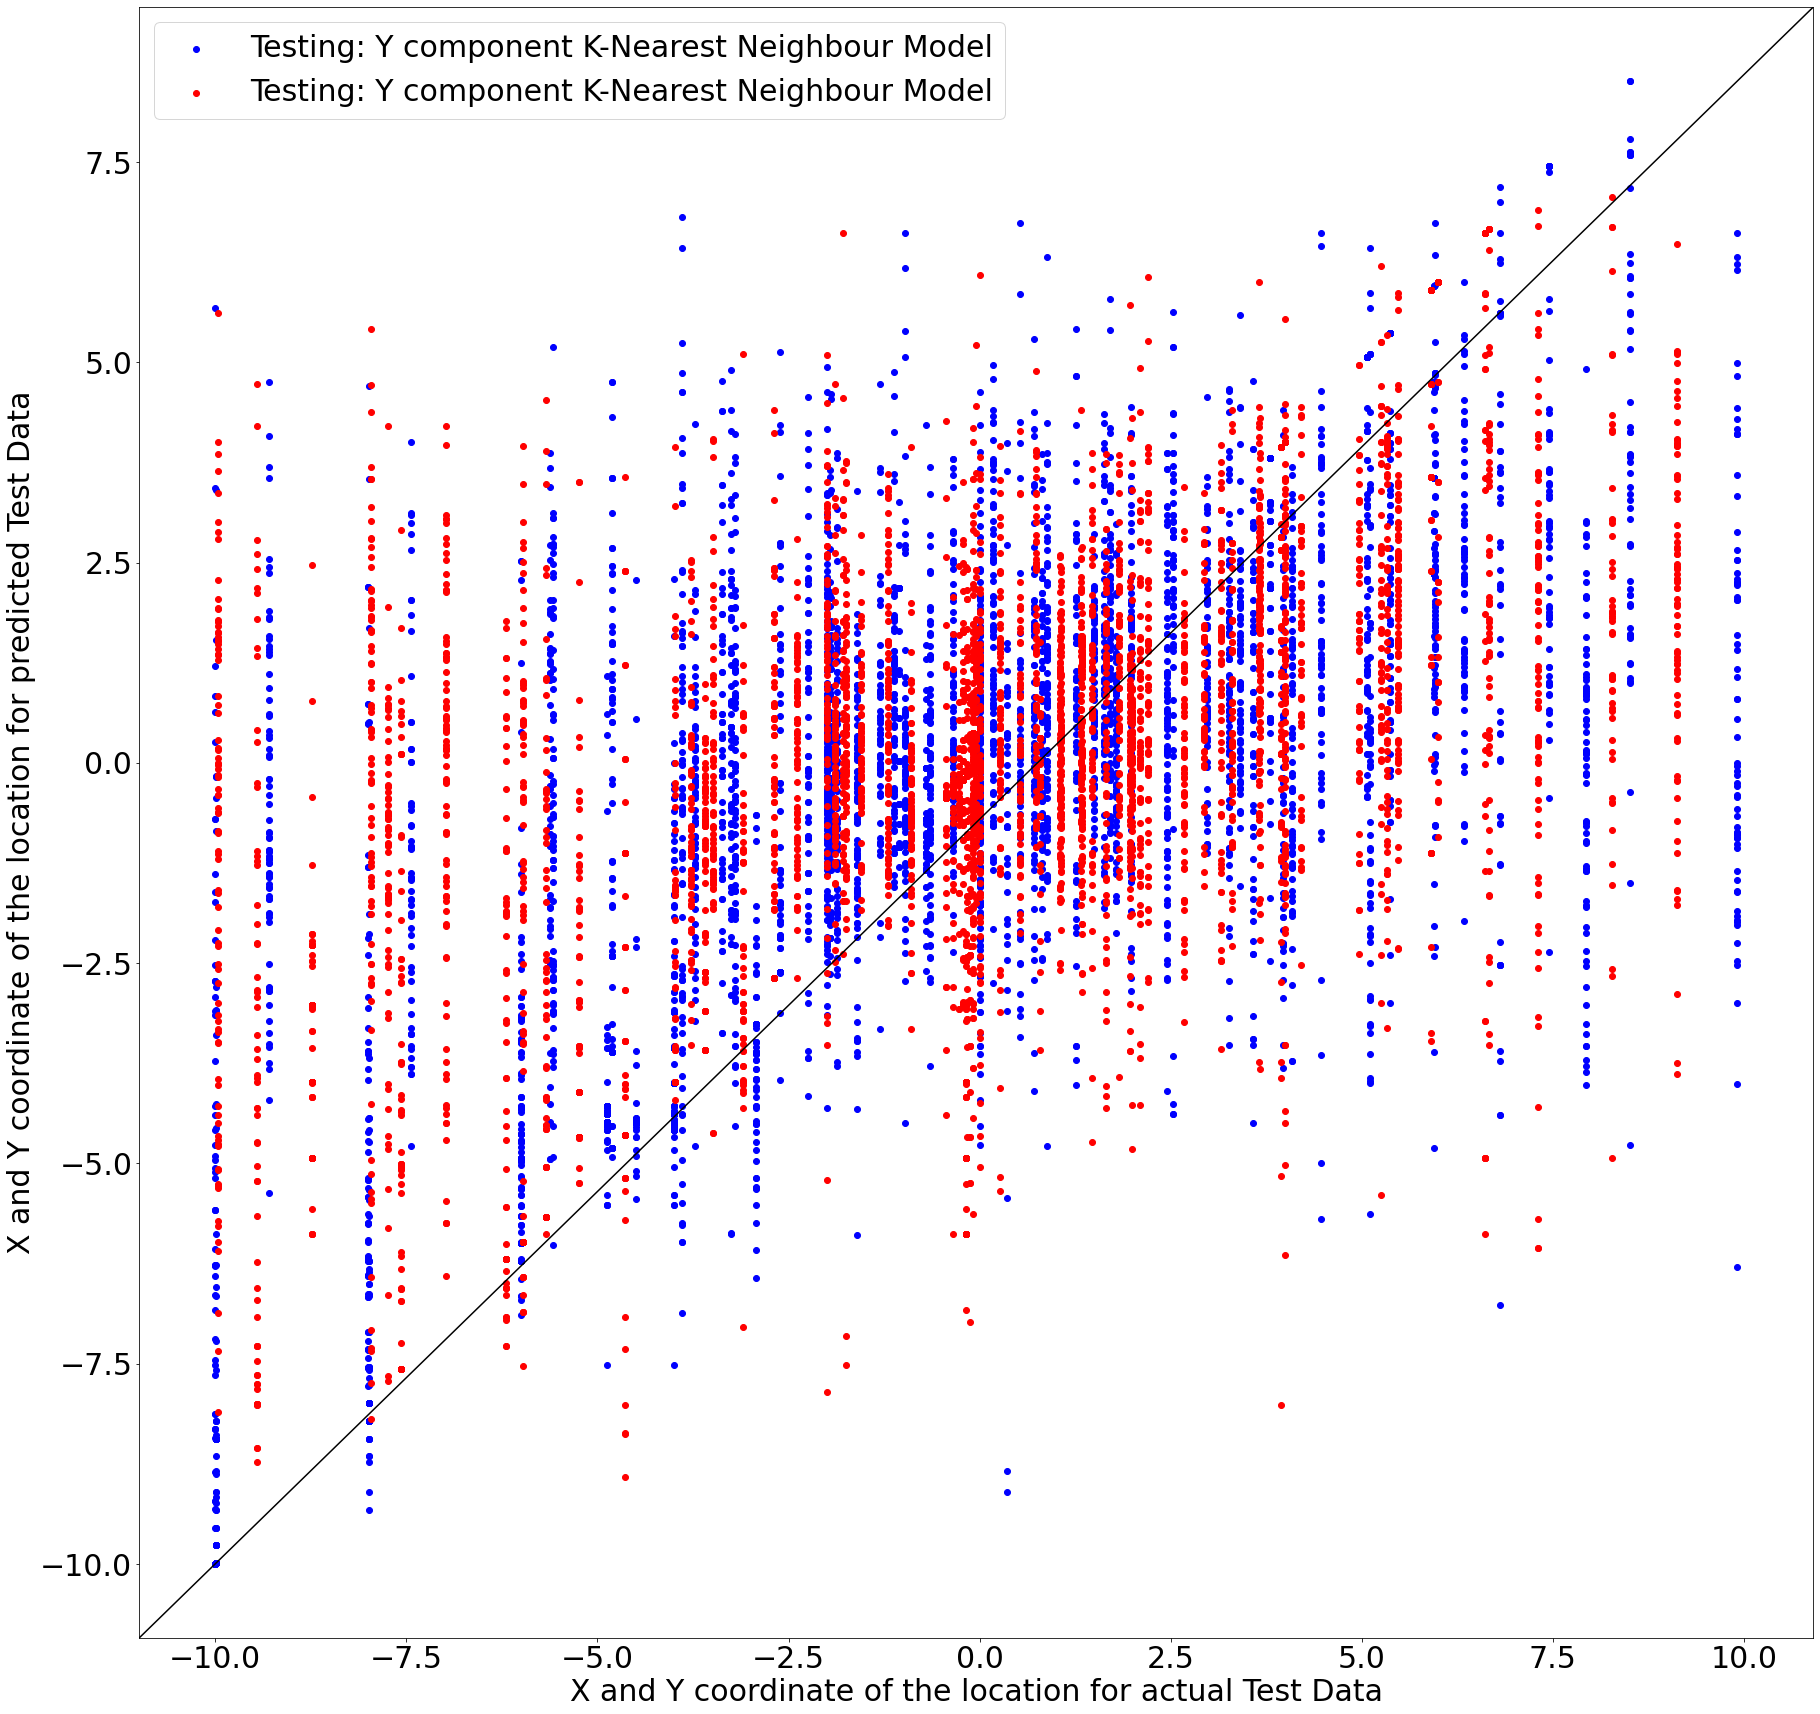

In [35]:
#plotting the y component
plt.rcParams['font.size'] = 30

fig1, ax3 = plt.subplots(figsize=(30, 30))
ax3.scatter(Y_ltest.iloc[:,1],pred_yl_df.iloc[:,1], color = 'blue', label = 'Testing: Y component K-Nearest Neighbour Model')
ax3.scatter(Y_ltest.iloc[:,0],pred_yl_df.iloc[:,0], color = 'red', label = 'Testing: Y component K-Nearest Neighbour Model')

# ax3.scatter(Y_ltest.iloc[:,1],pred_y_forest_df.iloc[:,1], color = 'blue' , label = 'Testing: Y component Random Forest Model')
# ax3.scatter(Y_ltest.iloc[:,0],pred_y_forest_df.iloc[:,0], color = 'red',  label = 'Testing: X component Random Forest Model')

# ax3.scatter(Y_ltest.iloc[:,0],pred_y_tree_df.iloc[:,0], color = 'red' , label = 'Testing: Y component Decision Tree Model')
# ax3.scatter(Y_ltest.iloc[:,1],pred_y_tree_df.iloc[:,1], color = 'blue' , label = 'Testing: Y component Decision Tree Model')


# ax3.scatter(Y_ltest.iloc[:,1],pred_y_tree_df.iloc[:,1], color = 'green')
# ax3.scatter(Y_ltest.iloc[:,1],pred_y_tree_df.iloc[:,1], color = 'green')
ax3.set_xlabel('X and Y coordinate of the location for actual Test Data')
ax3.set_ylabel('X and Y coordinate of the location for predicted Test Data')
line_test = mlines.Line2D([0, 1], [0, 1], color='black')
transform3 = ax3.transAxes
line_test.set_transform(transform3)
ax3.add_line(line_test)
plt.legend()
# plt.show()

#Plotting the X component
# fig1, ax4 = plt.subplots(figsize=(30, 20))
# ax4.scatter(Y_ltest.iloc[:,0],pred_yl_df.iloc[:,0], color = 'blue')
# ax3.scatter(Y_ltest.iloc[:,0],pred_y_forest_df.iloc[:,0], color = 'red',  label = 'Testing: X component Random Forest Model')
# ax4.scatter(Y_ltest.iloc[:,0],pred_y_tree_df.iloc[:,0], color = 'green')
# ax3.scatter(Y_ltest.iloc[:,1],pred_y_tree_df.iloc[:,1], color = 'green')

# ax4.set_xlabel('X coordinate of the location for actual Test Data')
# ax4.set_ylabel('X coordinate of the location for predicted Test Data')

# line_test = mlines.Line2D([0, 1], [0, 1], color='black')
# transform4 = ax4.transAxes
# line_test.set_transform(transform4)
# ax4.add_line(line_test)

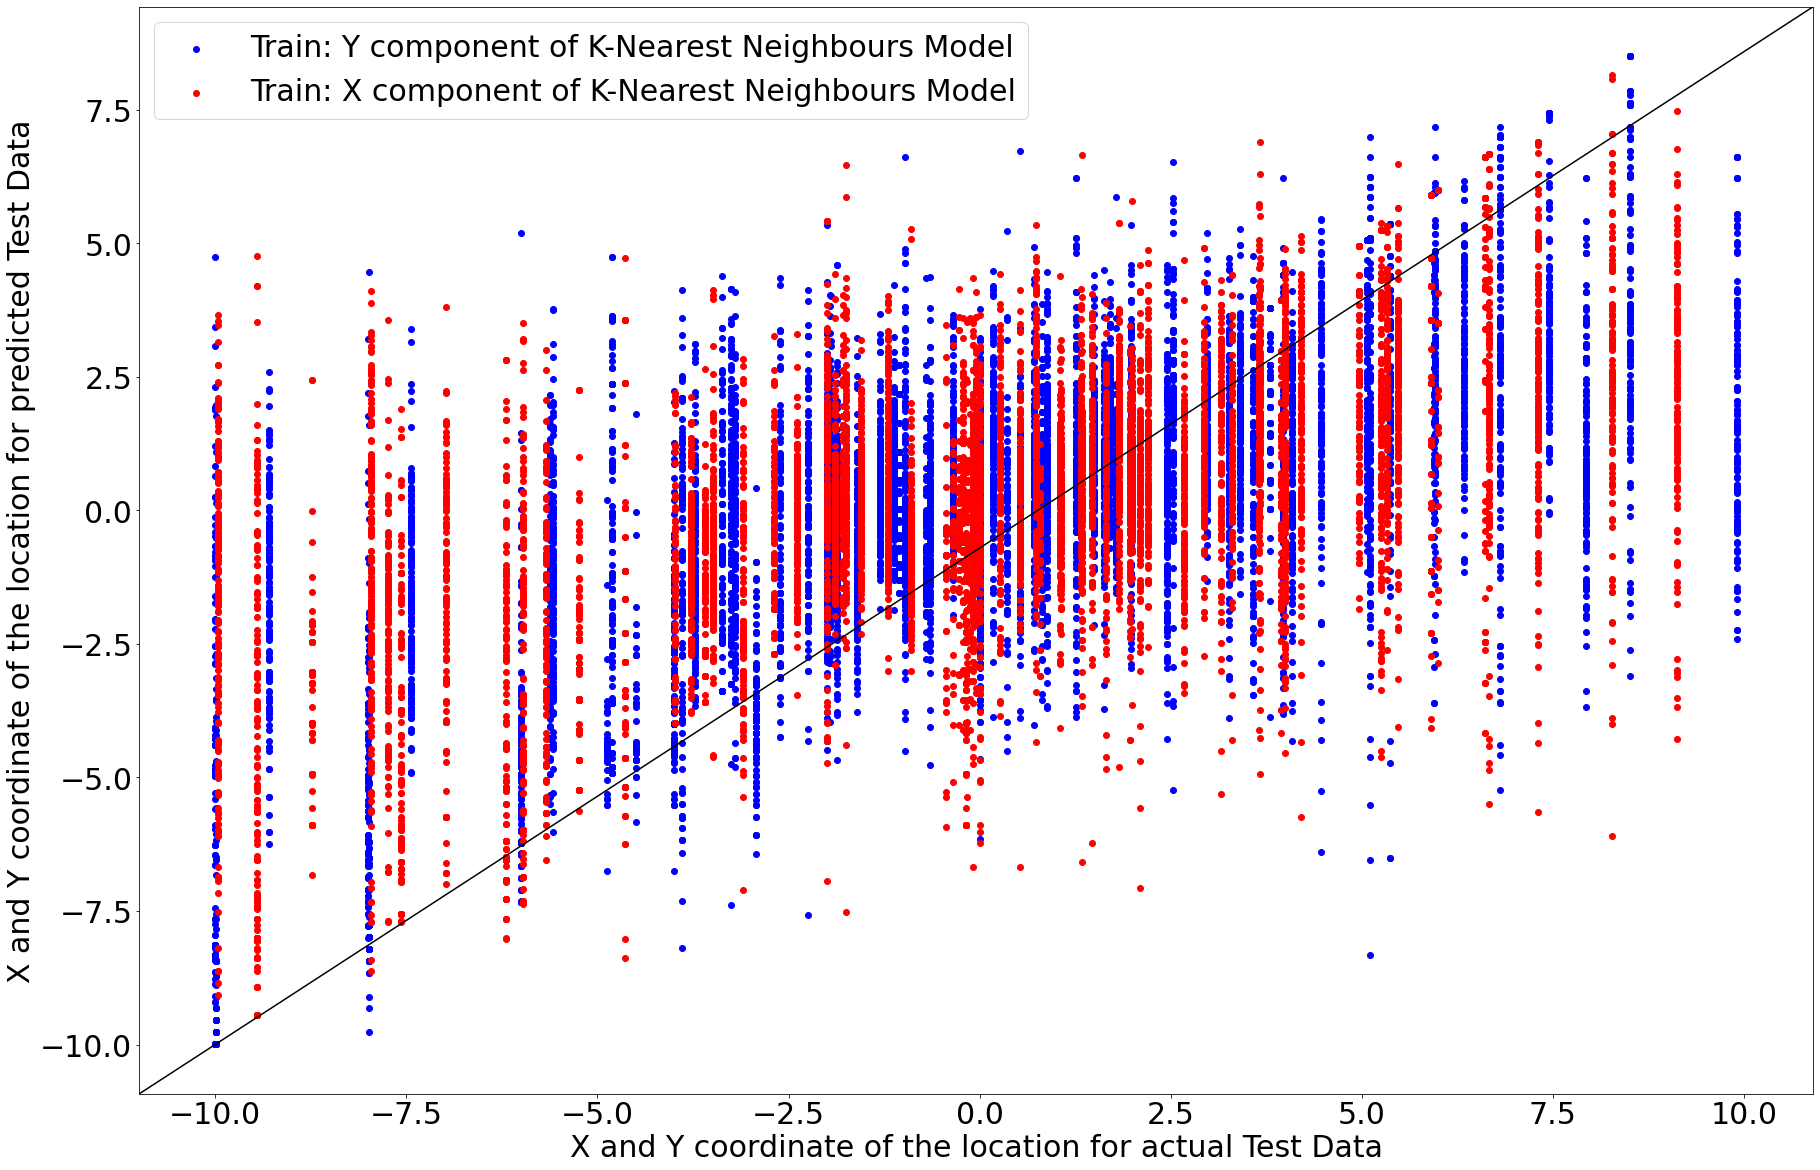

In [34]:
#For the train data
# y_test = Y_ltest.iloc[:,1]
plt.rcParams['font.size'] = 30
pred_yl_df_train = pd.DataFrame(pred_yl_train)
pred_y_forest_df_train = pd.DataFrame(pred_y_forest_train)
pred_y_tree_df_train = pd.DataFrame(pred_y_tree_train)
#plotting the y component
fig1, ax5 = plt.subplots(figsize=(30, 20))
ax5.scatter(Y_ltrain.iloc[:,1],pred_yl_df_train.iloc[:,1], color = 'blue', label = 'Train: Y component of K-Nearest Neighbours Model')
ax5.scatter(Y_ltrain.iloc[:,0],pred_yl_df_train.iloc[:,0], color = 'red',label = 'Train: X component of K-Nearest Neighbours Model')

# ax5.scatter(Y_ltrain.iloc[:,1],pred_y_forest_df_train.iloc[:,1], color = 'blue', label = 'Training: Y component Random Forest Model')
# ax5.scatter(Y_ltrain.iloc[:,1],pred_y_tree_df_train.iloc[:,1], color = 'blue', label = 'Train: Y component of Decision Tree Regressor')
# ax5.scatter(Y_ltrain.iloc[:,0],pred_y_tree_df_train.iloc[:,0], color = 'red', label = 'Train: X component of Decision Tree Regressor')

# ax5.scatter(Y_ltrain.iloc[:,0],pred_y_forest_df_train.iloc[:,0], color = 'red', label = 'Training: X component Random Forest Model')

ax5.set_xlabel('X and Y coordinate of the location for actual Test Data')
ax5.set_ylabel('X and Y coordinate of the location for predicted Test Data')

line_test = mlines.Line2D([0, 1], [0, 1], color='black')
transform5 = ax5.transAxes
line_test.set_transform(transform5)
ax5.add_line(line_test)
plt.legend()
plt.show()

#Plotting the X component
# fig1, ax6 = plt.subplots(figsize=(30, 20))
# ax6.scatter(Y_ltrain.iloc[:,0],pred_yl_df_train.iloc[:,0], color = 'blue',label = 'Train: X component KNeighbours')
# ax5.scatter(Y_ltrain.iloc[:,0],pred_y_forest_df_train.iloc[:,0], color = 'red', label = 'Training: X component Random Forest Model')
# ax6.scatter(Y_ltrain.iloc[:,0],pred_y_tree_df_train.iloc[:,0], color = 'green', label = 'Train: X component decision tree')
# ax6.set_xlabel('X coordinate of the location for actual Test Data')
# ax6.set_ylabel('X coordinate of the location for predicted Test Data')

# line_test = mlines.Line2D([0, 1], [0, 1], color='black')
# transform6 = ax6.transAxes
# line_test.set_transform(transform6)
# ax6.add_line(line_test)

In [36]:
#Eucleadian distance For model 1: >>>>KNN<<<<

Y_ltest_list = Y_ltest.values.tolist()
pred_yl_df_list = pred_yl_df.values.tolist()
pred_y_forest_df_list = pred_y_forest_df.values.tolist()
pred_y_tree_df_list = pred_y_tree_df.values.tolist()
pred_y_multiout_df_list = pred_y_multiout_df.values.tolist()


print(len(pred_yl_df_list))
eDistance = [] 
eDistance_forest = []
eDistance_tree = []
eDistance_multiout = []

for i in range(len(pred_yl_df_list)):    
    eDistance.append(math.dist(Y_ltest_list[i] ,pred_yl_df_list[i]))

for j in range(len(pred_y_forest_df_list)):    
    eDistance_forest.append(math.dist(Y_ltest_list[j] ,pred_y_forest_df_list[j]))

for k in range(len(pred_y_tree_df_list)):    
    eDistance_tree.append(math.dist(Y_ltest_list[k] ,pred_y_tree_df_list[k]))

for l in range(len(pred_y_multiout_df_list)):    
    eDistance_multiout.append(math.dist(Y_ltest_list[l] ,pred_y_multiout_df_list[l]))

# plt.plot(eDistance)
# plt.plot(Y_ltest)
average_d = np.mean(eDistance)
std_ed = np.std(eDistance)
print("The average and the standard deviation for KNN model is: ",average_d,std_ed)

#Forest Model
average_forest = np.mean(eDistance_forest)
std_forest = np.std(eDistance_forest)
print("The average and the standard deviation for Random Forest model is: ",average_forest,std_forest)

#Tree Model
average_tree = np.mean(eDistance_tree)
std_tree = np.std(eDistance_tree)
print("The average and the standard deviation for Decision Tree model is: ",average_tree,std_tree)

average_multiout = np.mean(eDistance_multiout)
std_multiout = np.std(eDistance_multiout)
print("The average and the standard deviation for multioutput model is: ",average_multiout,std_multiout)

5125
The average and the standard deviation for KNN model is:  4.138818418530236 3.087104393140635
The average and the standard deviation for Random Forest model is:  2.4711439786030343 2.8499108010677334
The average and the standard deviation for Decision Tree model is:  2.6504684267797685 4.472792084071363
The average and the standard deviation for multioutput model is:  4.561507637101402 2.7174257721799355


In [30]:
#load - new kernels
#location - improve generalisatio - type of classirier / regression -> new models
#email Arie for test data
#need to be detrended - 
#Convert to r and theta at the end (polar) or check the radius and angle and provide it to Arie.


#Poster: (figures in - more visual) Have best method/hyperparameters. 
#Report: Check different oarameters, Mention bias, Compare in a table (different parameters)
#Check test and trains against each other for location.

In [31]:
#Testing the output for the location
# def cart2pol(x, y):
#     r = np.sqrt(x ** 2 + y ** 2)
#     the = np.arctan2(y, x)
#     return (r, the)
r = []
t = []
deg = []

pred_y_forest_ex = model_forest.predict(X_ex)

pred_y_forest_ex_pd = pd.DataFrame(pred_y_forest_ex)
# print(pred_y_forest_ex_pd)

#converting the location from cartesian to polar:
for i in range(len(pred_y_forest_ex)):
    r.append(np.sqrt(pred_y_forest_ex[i,0]** 2 + pred_y_forest_ex[i,1] ** 2))
    t.append(np.arctan2(pred_y_forest_ex[i,1], pred_y_forest_ex[i,0]))
    deg.append((t[i]*180)/math.pi)
    if deg[i] < 0:
        deg[i] = deg[i] + 360
        

# print(np.arctan(pred_y_forest_ex[0,1], pred_y_forest_ex[0,0]))

# print(pred_y_forest_ex[0,1],pred_y_forest_ex[0,0])
# 542print(min(deg))

location = pd.DataFrame([r,deg]).T
location.columns = ['r', 'Angle']

print(location)
location.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Extra_points\Ex_location.csv',index = False, header = True)

             r       Angle
0     3.411867  168.127169
1     1.853010  159.375553
2     1.297238   73.275051
3     1.522586   62.894117
4     0.326107  156.879452
...        ...         ...
1558  2.620365  236.157716
1559  0.881042  295.971744
1560  0.759792  305.741578
1561  0.884399  295.403424
1562  1.044649  239.651678

[1563 rows x 2 columns]
